In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importing the sklearn face of celbrity dataset
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=50, resize=1.0,slice_=(slice(60, 180), slice(60, 180)))

In [3]:
#Importing all the necessary libraries for the CNN network and for the normal Logistic Regression
# !pip install keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, add, Activation, MaxPooling2D, Conv2D, Flatten, Dropout
from keras.layers import LeakyReLU
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import visualkeras
import cv2
from google.colab.patches import cv2_imshow

%matplotlib inline

In [4]:
#Verify the name of the celebrity and the shape of the input image
print(faces.target_names)
print(faces.images.shape)
print(len(faces.target_names))

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien'
 'John Ashcroft' 'Junichiro Koizumi' 'Serena Williams' 'Tony Blair']
(1560, 120, 120)
12


In [5]:
#Creating the input X variable and the output y variable and creating a 8 vector matrix for the output variable
X = faces.images
y = faces.target
X = X.reshape(X.shape[0], X.shape[1], X.shape[2],1)
y = y.reshape(X.shape[0], 1)

yy = pd.DataFrame(y)
yy.columns = ["Trgt"]
Y = pd.get_dummies(yy["Trgt"], prefix='target')
y=np.array(Y)

print(X.shape)
print(y.shape)
numclass=y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



(1560, 120, 120, 1)
(1560, 12)


In [6]:
#Convolutional Neural Network installation and establishing the other needed layers of Covolutional filters,
#MaxPoolng, Hidden layers and compilation layer

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='valid',input_shape=(120,120,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='valid'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear',padding='valid'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='valid'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(numclass, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 118, 118, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 59, 59, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 57, 57, 64)        0         
                                                        

In [7]:
#Model fit of the training dataset
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50, min_delta=0.0001, verbose=1, mode='min')
H1 = model.fit(X_train, y_train, epochs=150, batch_size=100, verbose=1, validation_split=0.1,callbacks=[callback])


Epoch 1/150
12/12 [==============================] - 4s 94ms/step - loss: 72.1959 - accuracy: 0.1505 - val_loss: 3.7150 - val_accuracy: 0.3520
Epoch 2/150
12/12 [==============================] - 1s 57ms/step - loss: 10.8260 - accuracy: 0.1621 - val_loss: 23.2479 - val_accuracy: 0.0320
Epoch 3/150
12/12 [==============================] - 1s 60ms/step - loss: 3.6450 - accuracy: 0.1923 - val_loss: 19.5727 - val_accuracy: 0.1360
Epoch 4/150
12/12 [==============================] - 1s 62ms/step - loss: 2.6010 - accuracy: 0.2066 - val_loss: 24.0098 - val_accuracy: 0.1600
Epoch 5/150
12/12 [==============================] - 1s 68ms/step - loss: 2.4067 - accuracy: 0.2663 - val_loss: 22.1918 - val_accuracy: 0.1520
Epoch 6/150
12/12 [==============================] - 1s 59ms/step - loss: 2.3289 - accuracy: 0.2520 - val_loss: 23.6454 - val_accuracy: 0.1280
Epoch 7/150
12/12 [==============================] - 1s 65ms/step - loss: 2.2784 - accuracy: 0.2885 - val_loss: 26.7593 - val_accuracy: 0.120

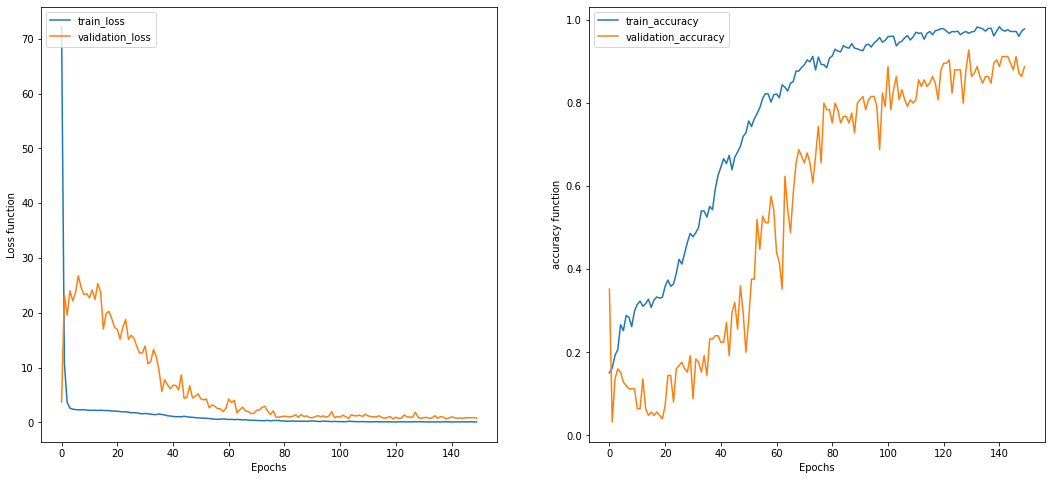

In [8]:
#Plotting the resultant loss and the accuracy of the training and validation model
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.plot(H1.history["loss"], label='train_loss')
plt.plot(H1.history["val_loss"], label='validation_loss')
plt.xlabel("Epochs")
plt.ylabel("Loss function")
plt.legend(loc='upper left')
plt.subplot(1,2,2)
plt.plot(H1.history["accuracy"], label='train_accuracy')
plt.plot(H1.history["val_accuracy"], label='validation_accuracy')
plt.xlabel("Epochs")
plt.ylabel("accuracy function")
plt.legend(loc='upper left')
plt.show()

In [9]:
y_pred = model.predict(X_test)
print("The accuracy of the predicted value from the model against the test value:", (1-np.mean(np.abs(y_pred-y_test)))*100)
loss, accuracy = model.evaluate(X_test, y_test)
print("The loss value of the test dataset", loss)
print("The accuracy value of the test dataset:", accuracy*100)


10/10 [==============================] - 0s 17ms/step
The accuracy of the predicted value from the model against the test value: 98.42647444456816
10/10 [==============================] - 0s 10ms/step - loss: 0.7202 - accuracy: 0.9135
The loss value of the test dataset 0.7201988697052002
The accuracy value of the test dataset: 91.34615659713745


In [10]:
n_samples, h, w = faces.images.shape
target_names = faces.target_names

y_test=np.argmax(y_test, axis=-1)
y_pred=np.argmax(y_pred, axis=-1)

y_pred.shape


(312,)

In [11]:
print(classification_report(y_test,y_pred,target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.91      0.91      0.91        11
     Colin Powell       0.98      0.93      0.95        55
  Donald Rumsfeld       0.95      0.84      0.89        25
    George W Bush       0.91      0.94      0.93       107
Gerhard Schroeder       0.86      0.90      0.88        21
      Hugo Chavez       1.00      0.79      0.88        14
   Jacques Chirac       0.62      0.71      0.67         7
    Jean Chretien       0.91      0.83      0.87        12
    John Ashcroft       1.00      0.92      0.96        12
Junichiro Koizumi       1.00      1.00      1.00         8
  Serena Williams       0.70      1.00      0.82         7
       Tony Blair       0.89      0.94      0.91        33

         accuracy                           0.91       312
        macro avg       0.89      0.89      0.89       312
     weighted avg       0.92      0.91      0.91       312



<ipython-input-12-ce4f5be2dd76>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(n_row, n_col, k + 1)


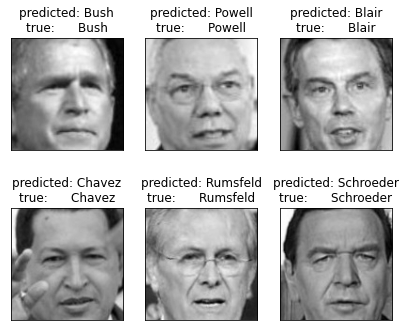

In [12]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=3):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    i=0
    k=0
    t=[]
    while(k<6):
        plt.subplot(n_row, n_col, k + 1)
        if(titles[i] in t):
          i=i+1
          continue
        else:
          plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
          plt.title(titles[i], size=12)
          plt.xticks(())
          plt.yticks(())
          t.append(titles[i])
          k=k+1
        i=i+1


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

plt.show()